In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Code.toolbox import compare_freq


In [2]:
# Noise
# 1. low-freq normal noise
# 2. nk2 normal noise
# 3. laplace noise
# 4. real data

# filter
# 1. fft_denoise
# 2. Savgol Filters
# 3. Wiener Filters + new method
# 4. Matched Filters
# 5. Notch Filters

In [3]:
from Code.Tutorial.Dataset import load_scg

def load_(path):
    data = np.load(path)
    signals, labels = data[:, :1000], data[:, 1000:]
    return signals, labels

signals_n_0, labels_n_0 = load_('../../Data/Normal/sim_5000_0_90_140_train_normal.npy')
signals_n_1, labels_n_1 = load_('../../Data/Normal/sim_5000_0.1_90_140_train_normal.npy')
signals_n_4, labels_n_4 = load_('../../Data/Normal/sim_5000_0.4_90_140_train_normal.npy')
signals_n_8, labels_n_8 = load_('../../Data/Normal/sim_5000_0.8_90_140_train_normal.npy')

signals_l_0, labels_l_0, duration, fs = load_scg(0, 'train')
signals_l_1, labels_l_1, _, _ = load_scg(0.1, 'train')
signals_l_8, labels_l_8, _, _ = load_scg(0.8, 'train')

### FFT Denoise

Manually remove RR
How to care it automatically?

In [4]:
from Code.Tutorial.denoise_fft import fft_denoise

In [20]:
fft_denoise?

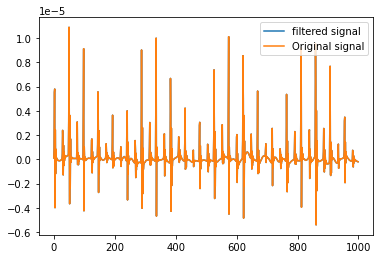

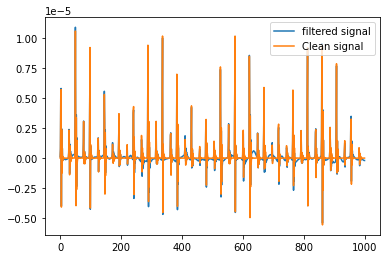

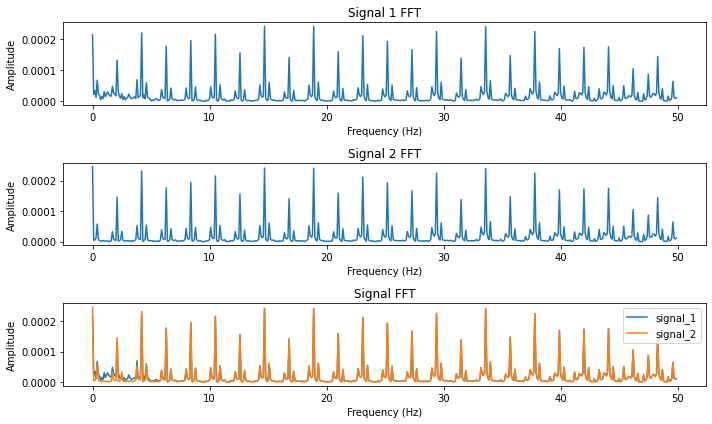

In [5]:
threhold = 0.00000 ** 2
idx = 0
ffted_signal_n_1 = fft_denoise(signals_n_1[idx], threhold)
plt.figure()
plt.plot(ffted_signal_n_1, label='filtered signal')
plt.plot(signals_n_1[idx], label='Original signal')
plt.legend()
plt.figure()
plt.plot(ffted_signal_n_1, label='filtered signal')
plt.plot(signals_n_0[idx], label='Clean signal')

plt.legend()

compare_freq(ffted_signal_n_1, signals_n_0[idx])

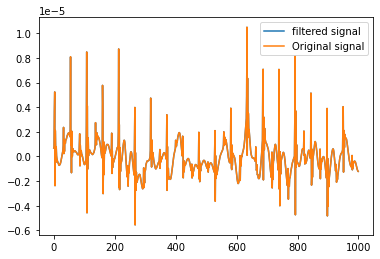

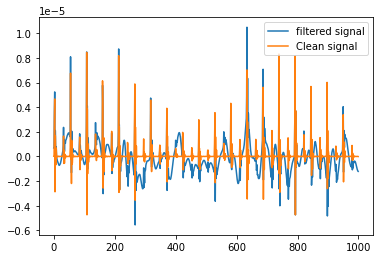

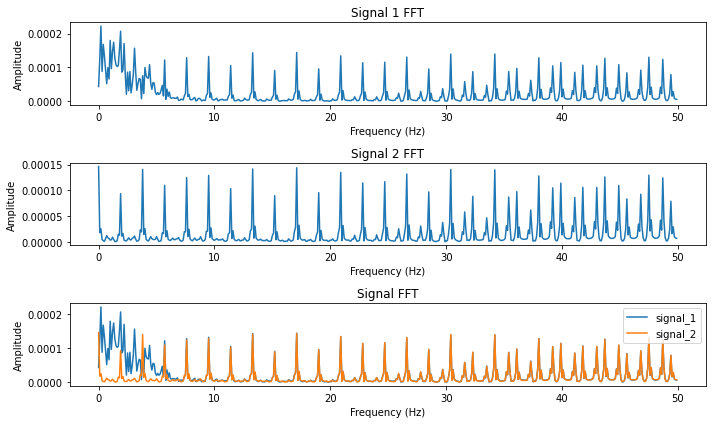

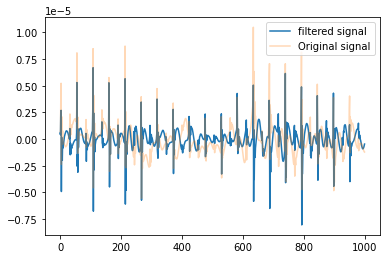

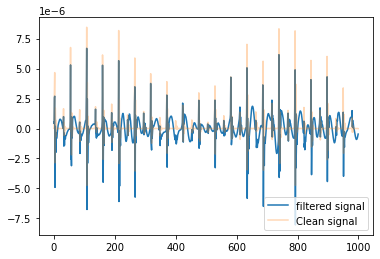

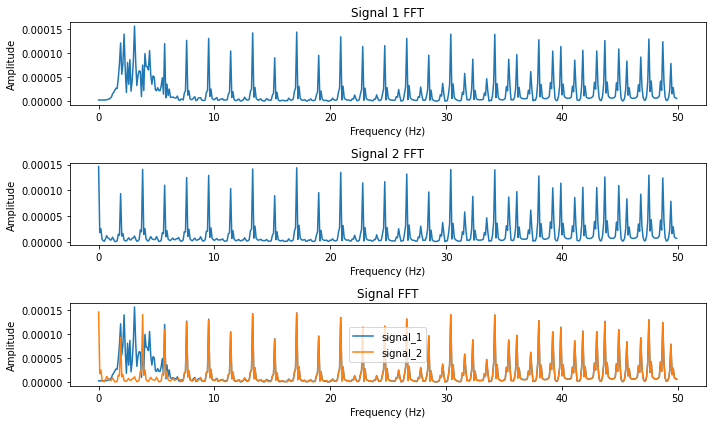

In [6]:
threhold = 0.00000 ** 2
idx = 21

ffted_signal_n_8 = fft_denoise(signals_n_8[idx], threhold)
plt.figure()
plt.plot(ffted_signal_n_8, label='filtered signal')
plt.plot(signals_n_8[idx], label='Original signal')
plt.legend()
plt.figure()
plt.plot(ffted_signal_n_8, label='filtered signal')
plt.plot(signals_n_0[idx], label='Clean signal')
plt.legend()

from Code.Tutorial.filter_butterworth import butter_highpass_filter,butter_bandstop_filter

compare_freq(ffted_signal_n_8, signals_n_0[idx])

highpass_signal_n_8 = butter_highpass_filter(ffted_signal_n_8, 2, fs)

plt.figure()
plt.plot(highpass_signal_n_8, label='filtered signal')
plt.plot(signals_n_8[idx], label='Original signal', alpha=0.3)
plt.legend()
plt.figure()
plt.plot(highpass_signal_n_8, label='filtered signal')
plt.plot(signals_n_0[idx], label='Clean signal', alpha=0.3)
plt.legend()

compare_freq(highpass_signal_n_8, signals_n_0[idx])


(1000,)


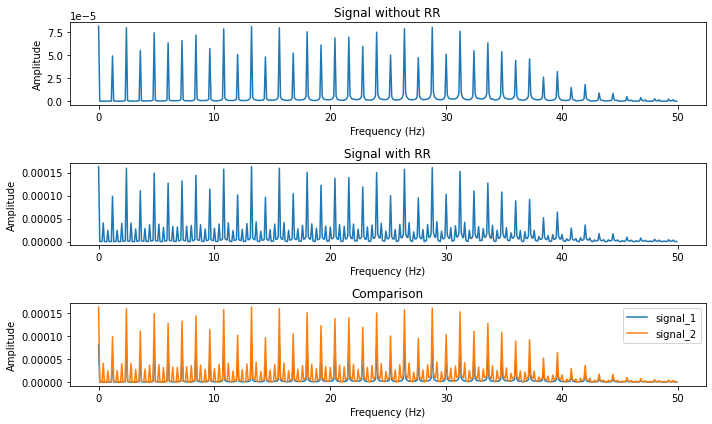

In [17]:
# plt.plot(signals_l_0[idx+100])
idx=0
t = np.linspace(0, 10, 1000)
print(t.shape)
signals_l_0_r = signals_l_0[idx+100] * (2 + np.sin(2 * np.pi * 0.4 * t))
# compare_freq(signals_l_0_r, signals_l_0[idx+100] )

ffted_signals_l_0_r = fft_denoise(signals_l_0_r, 0.000000000002)
# compare_freq(signals_l_0_r, ffted_signals_l_0_r )
compare_freq(signals_l_0[idx+100], signals_l_0_r)
# ffted_signals_l_0_r

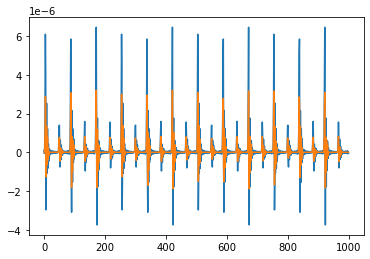

In [8]:
plt.plot(ffted_signals_l_0_r)
plt.plot(signals_l_0[idx+100] )

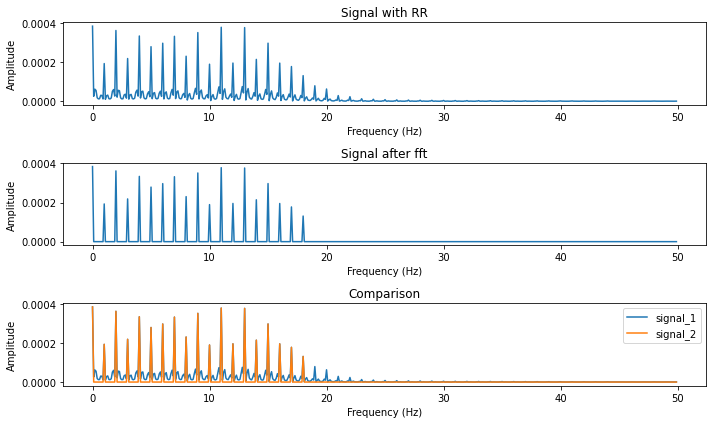

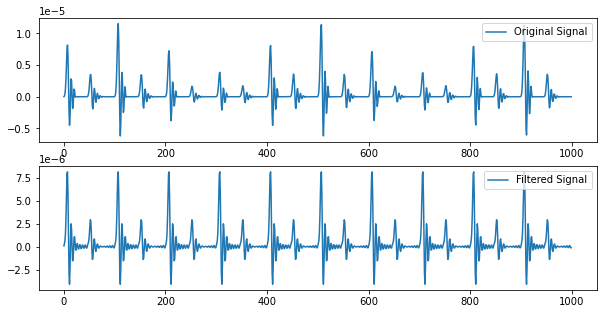

In [60]:
iidx = 13
ffted_signals_n_0_r = fft_denoise(signals_n_0[iidx], 0.000000000007)
compare_freq(signals_n_0[iidx], ffted_signals_n_0_r)
# plt.figure(figsize=(10, 3))
plt.subplots(2, 1,figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(signals_n_0[iidx], label='Original Signal')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(ffted_signals_n_0_r, label='Filtered Signal')
plt.legend()
plt.savefig('./pic/signal_after_fft.jpg', dpi=300)

### Savgol Filters
1. 无论对于Normal Noise还是Laplace Noise效果都是好的出奇, 对于直接+np.random.normal()的效果很差
2. 对比于SSA和Decompose的效果如何呢？
3. 如果对有RR的，Normal Noise Level = 0.8的数据进行处理，会是什么结果呢？

In [40]:
from Code.Tutorial.filter_savgol import savgol_filter

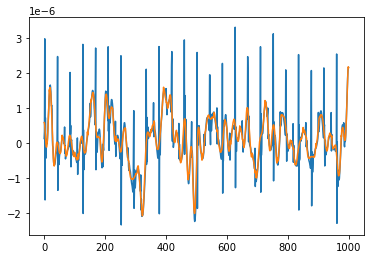

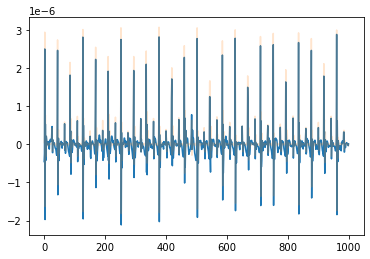

In [41]:
idx = 1
signal_l_8 = signals_l_8[idx]
signal_n_8 = signals_n_8[idx]

savgol_signal_l_8 = savgol_filter(signal_l_8, 32 , 5)
plt.plot(signal_l_8)
plt.plot(savgol_signal_l_8)
plt.figure()
plt.plot(signal_l_8 - savgol_signal_l_8)
plt.plot(signals_l_0[idx], alpha=0.2)

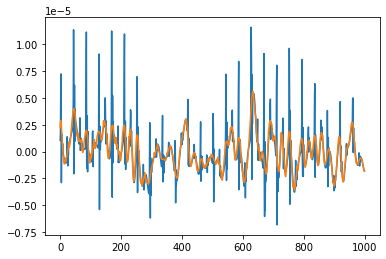

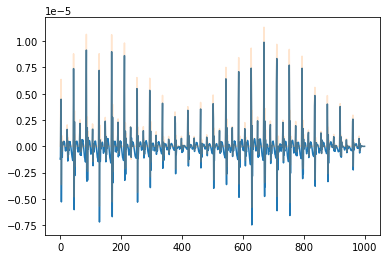

In [42]:
idx = 11
signal_l_8 = signals_l_8[idx]
signal_n_8 = signals_n_8[idx]

savgol_signal_n_8 = savgol_filter(signal_n_8, 32 , 5)
plt.plot(signal_n_8)
plt.plot(savgol_signal_n_8)
plt.figure()
plt.plot(signal_n_8 - savgol_signal_n_8)
plt.plot(signals_n_0[idx], alpha=0.2)

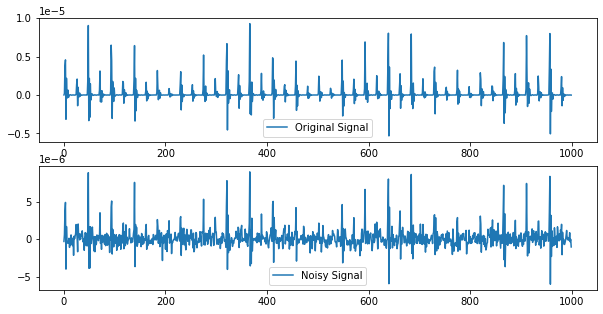

In [43]:
idx = 10
signal_l_8 = signals_l_8[idx]
signal_n_8 = signals_n_8[idx]
signal_n_0 = signals_n_0[idx]
noise = np.random.normal(loc=0.0, scale=0.7, size=signal_n_0.shape) / 1e6
signal_n_x = signal_n_0 + noise

plt.subplots(2, 1,figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(signal_n_0, label='Original Signal')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(signal_n_x, label='Noisy Signal')
plt.legend()
plt.savefig('./pic/direct_add_normal.jpg', dpi=300)

(1000,)


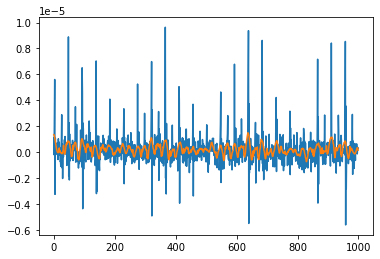

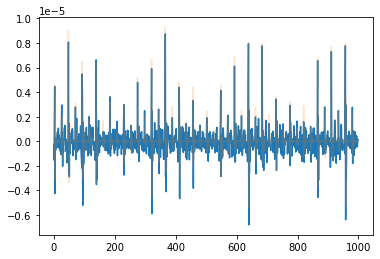

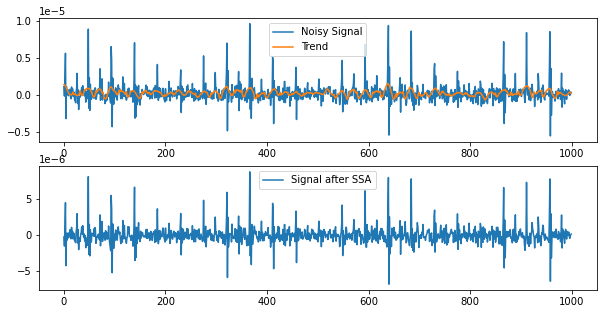

In [45]:
idx = 10
signal_l_8 = signals_l_8[idx]
signal_n_8 = signals_n_8[idx]
signal_n_0 = signals_n_0[idx]
noise = np.random.normal(loc=0.0, scale=0.6, size=signal_n_0.shape) / 1e6
signal_n_x = signal_n_0 + noise
print(signal_n_x.shape)
savgol_signal_n_x = savgol_filter(signal_n_x, 32 , 5)
plt.plot(signal_n_x)
plt.plot(savgol_signal_n_x)
plt.figure()
plt.plot(signal_n_x - savgol_signal_n_x)
plt.plot(signal_n_0, alpha=0.2)

plt.subplots(2, 1,figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(signal_n_x, label='Noisy Signal')
plt.plot(savgol_signal_n_x, label='Trend')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(signal_n_x - savgol_signal_n_x, label='Signal after SSA')
plt.legend()
plt.savefig('./pic/ssa2normal.jpg', dpi=300)

In [47]:
def get_noise(signal, peaks, distance=8):
    margin = peaks[0]
    mask = np.ones(signal.shape)
    mask_added = np.zeros(signal.shape)
    for i in range(len(peaks)):
        peak = peaks[i]
        if i == len(peaks)-1:
            peak_next = 1000
        else:
            peak_next = peaks[i+1]-margin
        if i % 2 == 1:
            dis = distance * 2
        else:
            dis = distance
        mask[peak-margin: peak+dis] = 0
        mask_added[peak-margin: peak+dis] = np.mean(signal[peak+dis: peak_next])
    return signal * mask + mask_added

In [48]:
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

def update_array(a, data_tmp):
    i = 0
    while i < len(a) - 2:
        if data_tmp[a[i]] < data_tmp[a[i + 1]] < data_tmp[a[i + 2]]:
            a = np.delete(a, i)
        elif data_tmp[a[i]] > data_tmp[a[i + 1]] > data_tmp[a[i + 2]]:
            a = np.delete(a, i + 2)
        else:
            i += 1
    return a

def get_peaks(data_tmp, distance, duration, sampling_rate):
    data_tmp = data_tmp / np.max(data_tmp)

    t = np.linspace(0, duration, duration * sampling_rate)
    signal = data_tmp

    peak_indices, _ = find_peaks(signal)

    t_peaks = t[peak_indices]
    peak_values = signal[peak_indices]
    interpolation_func = interp1d(t_peaks, peak_values, kind='linear', bounds_error=False, fill_value=0)
    envelope = interpolation_func(t)

    peaks2, _ = find_peaks(envelope, distance=distance)

    peaks2 = update_array(peaks2, data_tmp)
    if len(peaks2) % 2 != 0:
        peaks2 = np.delete(peaks2, len(peaks2) - 1)

    return peaks2

In [49]:
def standize_1d(signal):
    return (signal - signal.mean()) / signal.std()

D:\ANACONDA\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\ANACONDA\envs\pytorch\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


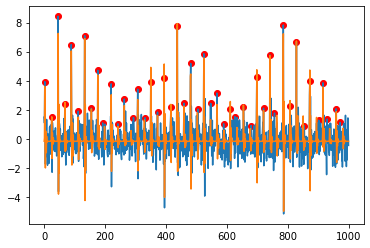

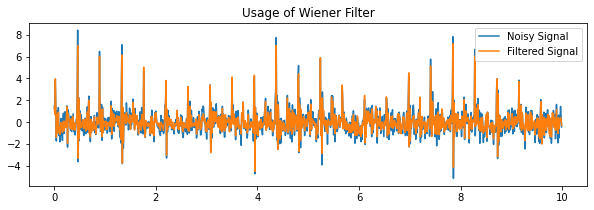

In [56]:
idx = 120
signal_n_8 = standize_1d(signals_n_8[idx])
signal_n_0 = standize_1d(signals_n_0[idx])
clean_signal = signal_n_0

noise = np.random.normal(loc=0.0, scale=0.8, size=signal_n_0.shape)
signal_n_x = signal_n_0 + noise

peaks = get_peaks(signal_n_x, 2000 // (labels_n_0[idx, 2]+2), 10, 100)

plt.figure()
plt.plot(signal_n_x)
plt.plot(clean_signal)
plt.scatter(peaks, signal_n_x[peaks], color='r')

sep_noise = get_noise(signal_n_x, peaks)
signal = signal_n_x - sep_noise
signal = np.nan_to_num(signal)
sep_noise = np.nan_to_num(sep_noise)
t = np.linspace(0, 10, 1000, endpoint=False)

signal_power = np.abs(np.fft.fft(signal))**2
noise_power = np.abs(np.fft.fft(sep_noise))**2
noise_power = np.mean(noise_power)
snr = signal_power / noise_power
wiener_filter = 1 / (1 + 1 / snr)

filtered_signal = np.fft.fft(signal_n_x) * wiener_filter
filtered_signal = np.fft.ifft(filtered_signal)

plt.figure(figsize=(10, 3))
# plt.plot(t, clean_signal, label='Clean Signal', color='blue')
plt.plot(t, signal_n_x, label='Noisy Signal')
plt.plot(t, np.real(filtered_signal), label='Filtered Signal')
plt.title('Usage of Wiener Filter')
plt.legend()
plt.savefig('./usage_of_wiener_filter.jpg', dpi=300)
plt.show()

# peaks = get_peaks(np.real(filtered_signal), 2000 // (labels_n_0[idx, 2]+2), 10, 100)
#
# plt.figure()
# plt.plot(np.real(filtered_signal))
# plt.plot(clean_signal)
#
# plt.scatter(peaks, np.real(filtered_signal)[peaks], color='r')
# compare_freq(clean_signal, np.real(filtered_signal))
#
# ffted_filtered_signal = fft_denoise(np.real(filtered_signal), 4)
# plt.figure()
# plt.plot(clean_signal)
# plt.plot(ffted_filtered_signal)
# compare_freq(ffted_filtered_signal, clean_signal)


### Real Data

In [109]:
signals_t_train, labels_t_train = load_('../../Data/RealData/all_back_train.npy')
signals_t_test , labels_t_test = load_('../../Data/RealData/all_back_test.npy')


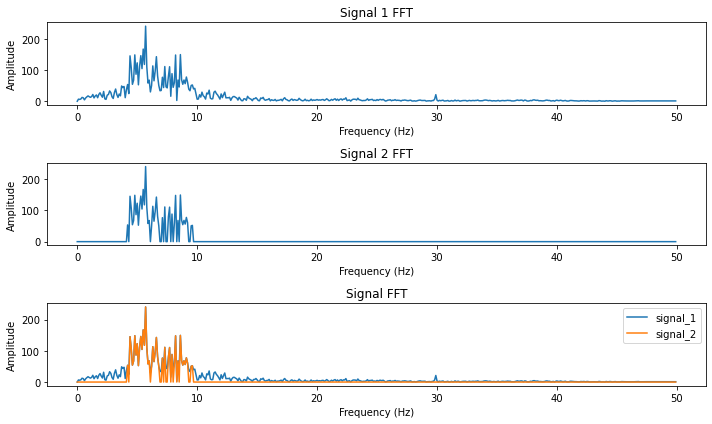

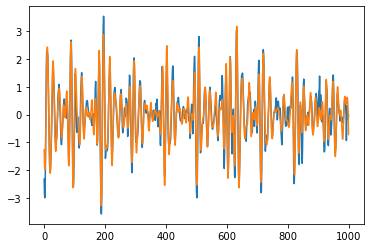

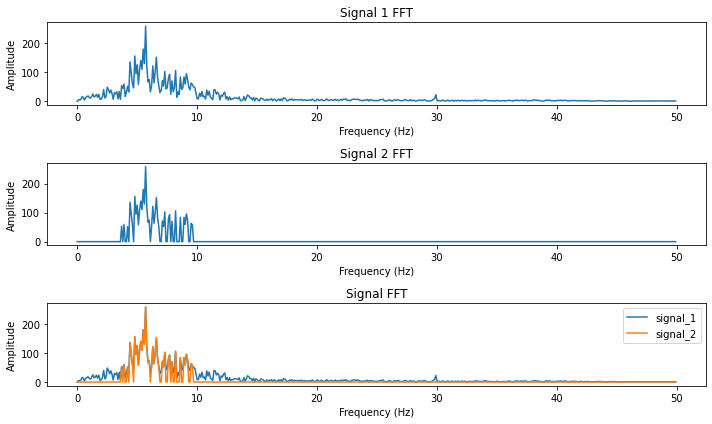

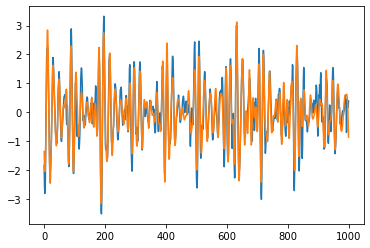

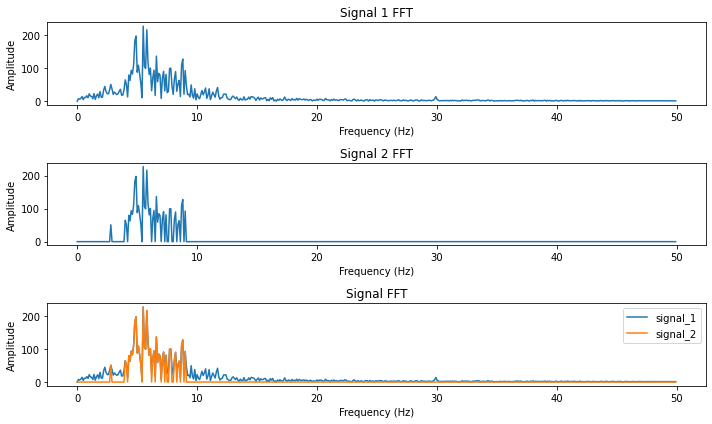

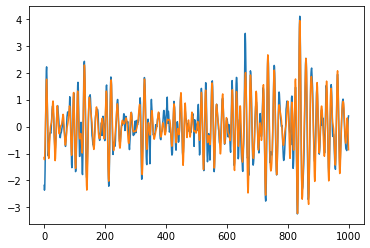

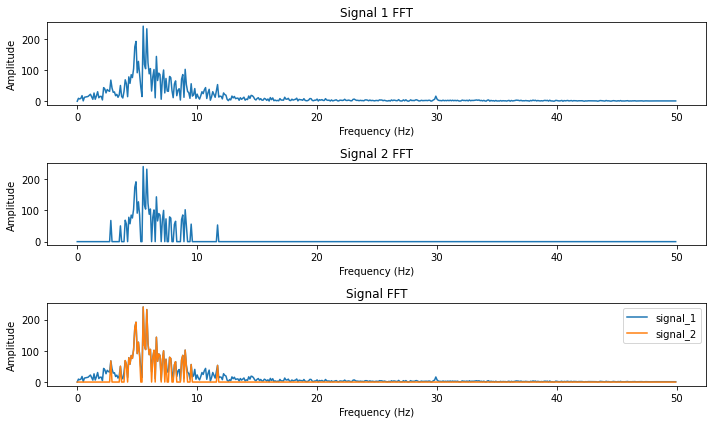

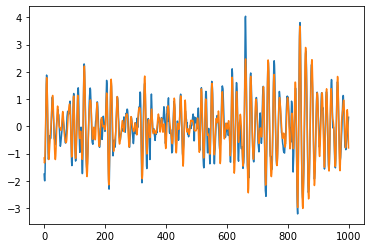

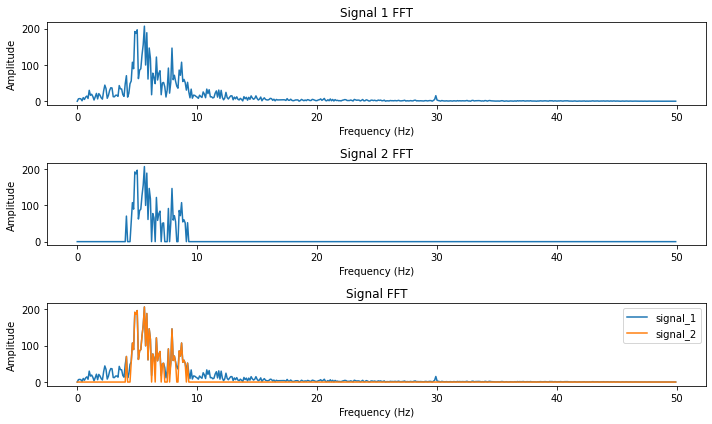

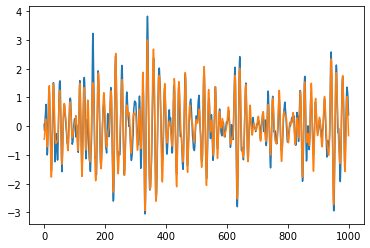

In [123]:
for idx in range(14):
    signal = standize_1d(signals_t_train[idx])
    ffted_signal_t = fft_denoise(signal, 2.5)

    compare_freq(signal, ffted_signal_t)
    plt.plot(signal)
    plt.plot(ffted_signal_t)
    if idx > 3:
        break

In [138]:
def add_echo_noise(
        signal, n_echo=5, attenuation_factor=[0.5,0.4,0.3,0.2,0.1], delay_factor=[10]*5, show=False
):
    if type(attenuation_factor) != list and type(attenuation_factor) != np.ndarray:
        raise ValueError("type of attenuation_factor must be list or numpy.ndarray")
    if type(delay_factor) != list and type(delay_factor) != np.ndarray:
        raise ValueError("type of delay_factor must be list or numpy.ndarray")

    if len(attenuation_factor) != n_echo or len(delay_factor) != n_echo:
        raise ValueError("len(attenuation_factor) and len(delay_factor) should be equal to n_echo")

    original_signal = signal.copy()
    for a_factor, d_factory in zip(attenuation_factor, delay_factor):
        attenuation_signal = original_signal * a_factor
        print(attenuation_signal[d_factory:].shape)
        print(attenuation_signal[:-d_factory].shape)
        attenuation_signal[d_factory:] = attenuation_signal[:-d_factory]
        attenuation_signal[:d_factory] = 0
        original_signal += attenuation_signal
    noisy_signal = original_signal + signal
    # if show:
    #     plot_noise_signal(signal, noisy_signal, 'Add Echo Noise')
    return noisy_signal

(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)
(990,)


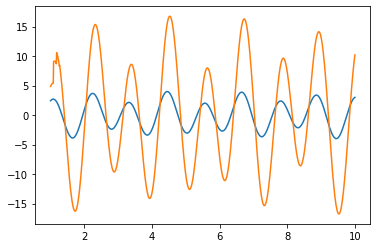

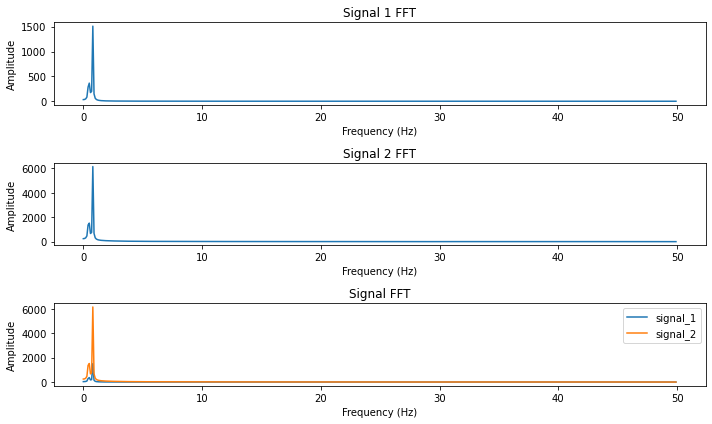

In [146]:
t = np.linspace(1, 10 , 1000)
sig = np.sin(2 * np.pi * 0.5 * t) + 3 * np.cos(2 * np.pi * 0.9 * t)
plt.plot(t, sig)
# from Code.Tutorial.add_noises import add_echo_noise
plt.plot(t,add_echo_noise(sig))
compare_freq(sig, add_echo_noise(sig))

(990,)
(990,)
(985,)
(985,)
(995,)
(995,)
(980,)
(980,)
(950,)
(950,)
(990,)
(990,)
(985,)
(985,)
(995,)
(995,)
(980,)
(980,)
(950,)
(950,)


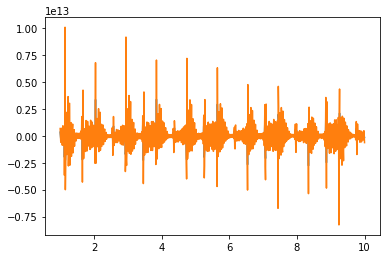

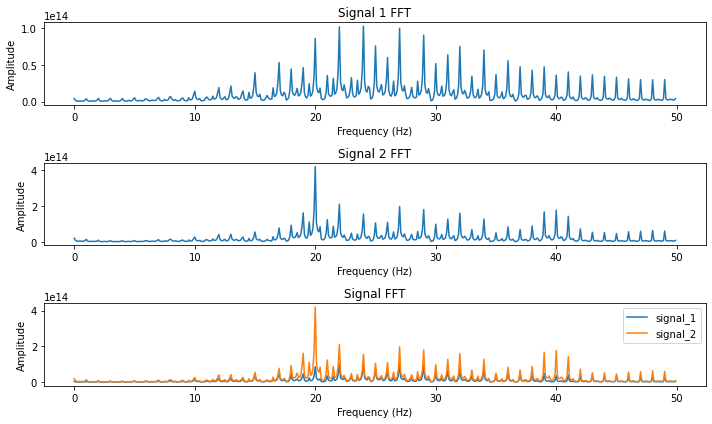

In [147]:
t = np.linspace(1, 10 , 1000)
idx = 1
sig = signals_n_0[idx]
plt.plot(t, sig)
# from Code.Tutorial.add_noises import add_echo_noise
plt.plot(t,add_echo_noise(sig, 5, [0.7, 0.4, 0.3, 0.2, 0.05], [10, 15, 5, 20, 50]))
compare_freq(sig, add_echo_noise(sig, 5, [0.7, 0.4, 0.3, 0.2, 0.05], [10, 15, 5, 20, 50]))

In [150]:
from Code.Tutorial.decompose import eemd_decomposition

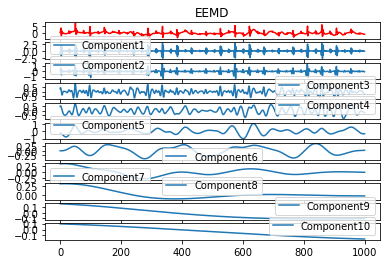

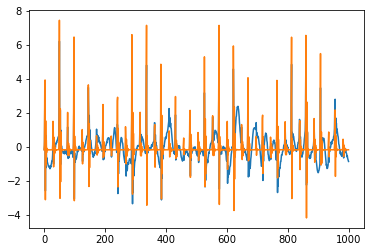

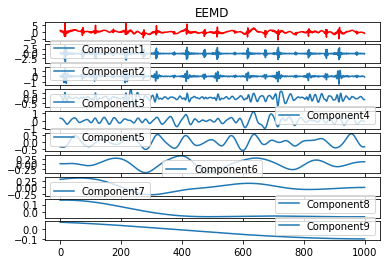

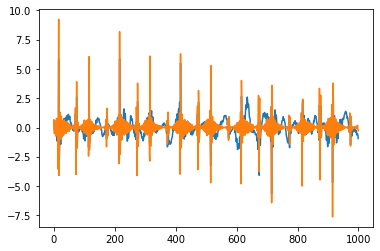

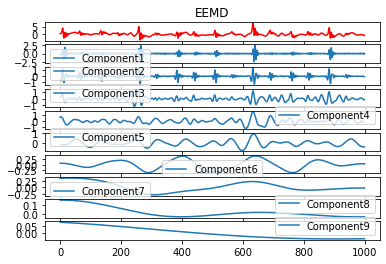

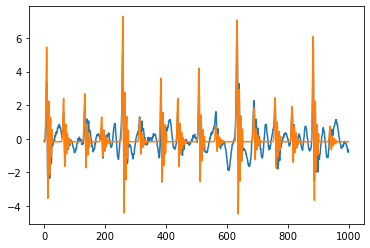

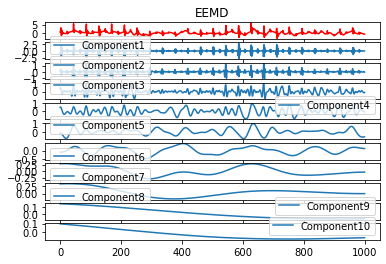

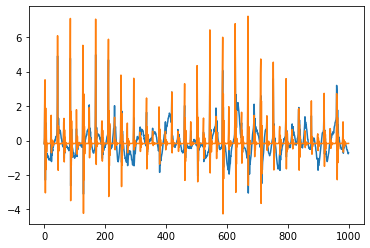

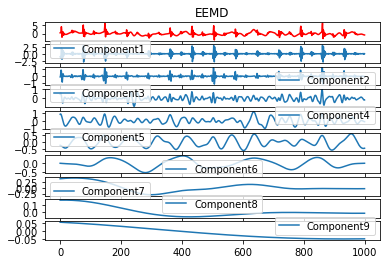

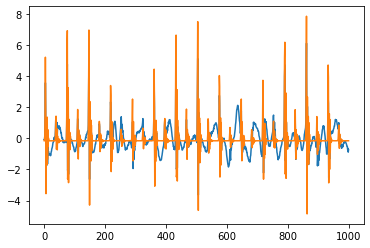

In [157]:
for idx in range(14):
    signal = standize_1d(signals_n_8[idx])
    imfs = eemd_decomposition(signal, show=True)
    r_signal = 0
    for i in range(len(imfs)-4):
        r_signal += imfs[i]


    plt.plot(r_signal)
    plt.plot(standize_1d(signals_n_0[idx]))
    if idx > 3:
        break

In [61]:
def compare_freq(sign1, sign2, sample_rate=100):
    # 计算信号的FFT
    fft1 = np.fft.fft(sign1)
    fft2 = np.fft.fft(sign2)

    # 计算频率轴
    n = len(sign1)
    freq = np.fft.fftfreq(n, d=1 / sample_rate)

    # 仅保留正半轴的频谱
    positive_freq_indices = np.where(freq >= 0)
    positive_freq = freq[positive_freq_indices]
    positive_fft1 = np.abs(fft1[positive_freq_indices])
    positive_fft2 = np.abs(fft2[positive_freq_indices])

    # 绘制FFT结果
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.title("Normal Noise added by NK2")
    plt.plot(positive_freq, np.abs(positive_fft1))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 2)
    plt.title("Normal Noise added Manually")
    plt.plot(positive_freq, np.abs(positive_fft2))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 3)
    plt.title("Comparison")
    plt.plot(positive_freq, np.abs(positive_fft1), label='signal_1')
    plt.plot(positive_freq, np.abs(positive_fft2), label='signal_2')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.savefig('./pic/diff_normal_noise.jpg', dpi=300)
    plt.show()

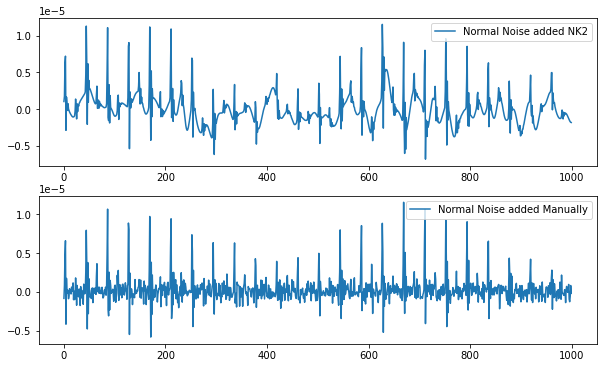

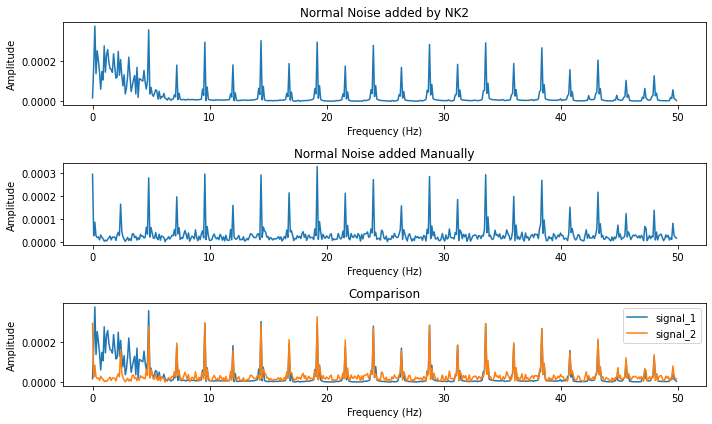

In [63]:
signals_n_0, labels_n_0 = load_('../../Data/Normal/sim_5000_0_90_140_train_normal.npy')
signals_n_1, labels_n_1 = load_('../../Data/Normal/sim_5000_0.1_90_140_train_normal.npy')
signals_n_4, labels_n_4 = load_('../../Data/Normal/sim_5000_0.4_90_140_train_normal.npy')
signals_n_8, labels_n_8 = load_('../../Data/Normal/sim_5000_0.8_90_140_train_normal.npy')

signals_l_0, labels_l_0, duration, fs = load_scg(0, 'train')
signals_l_1, labels_l_1, _, _ = load_scg(0.1, 'train')
signals_l_8, labels_l_8, _, _ = load_scg(0.8, 'train')

noise = np.random.normal(loc=0.0, scale=0.7, size=signal_n_0.shape) / 1e6
signal_n_x = signal_n_0 + noise

iidx= 11
plt.subplots(2, 1, figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signals_n_8[iidx], label='Normal Noise added NK2')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(signals_n_0[iidx] + noise, label='Normal Noise added Manually')
plt.legend()
plt.savefig('./pic/diff_normal.jpg', dpi=300)
compare_freq(signals_n_8[iidx], signals_n_0[iidx] + noise)